In [1]:
import pandas as pd
df= pd.read_csv('netflix_titles.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [2]:
df.columns.tolist()


['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [3]:
df=df.drop_duplicates()

In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['year_added']  = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()


C:\Users\Laxmi\AppData\Local\Temp\ipykernel_14196\3124075903.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='type',palette='pastel')


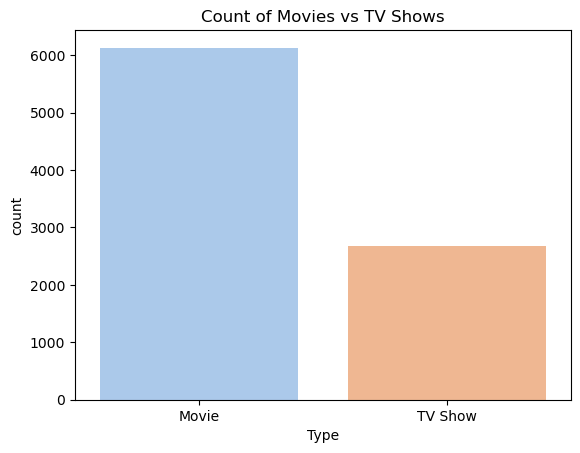

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df,x='type',palette='pastel')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("count")
plt.show()

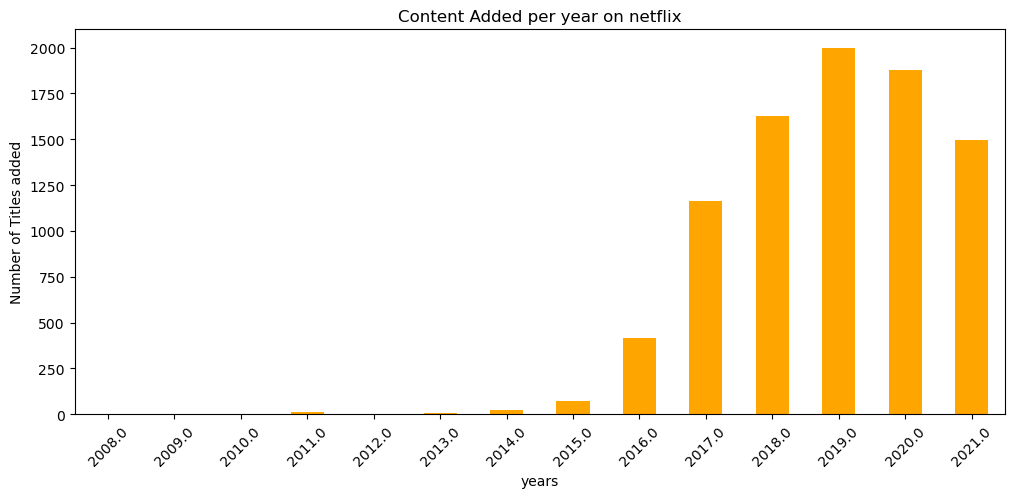

In [14]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(12,5), color='orange')
plt.title("Content Added per year on netflix")
plt.xlabel("years")
plt.ylabel("Number of Titles added")
plt.xticks(rotation=45)
plt.show()


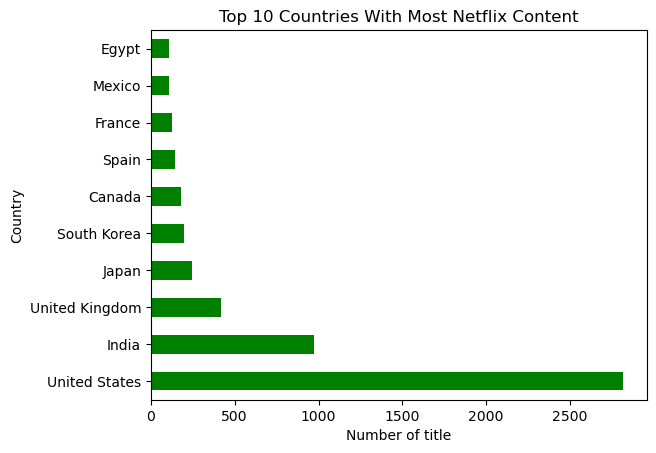

In [16]:
df['country'].value_counts().head(10).plot(kind='barh',color='green')
plt.title("Top 10 Countries With Most Netflix Content")
plt.xlabel("Number of title")
plt.ylabel("Country")
plt.show()


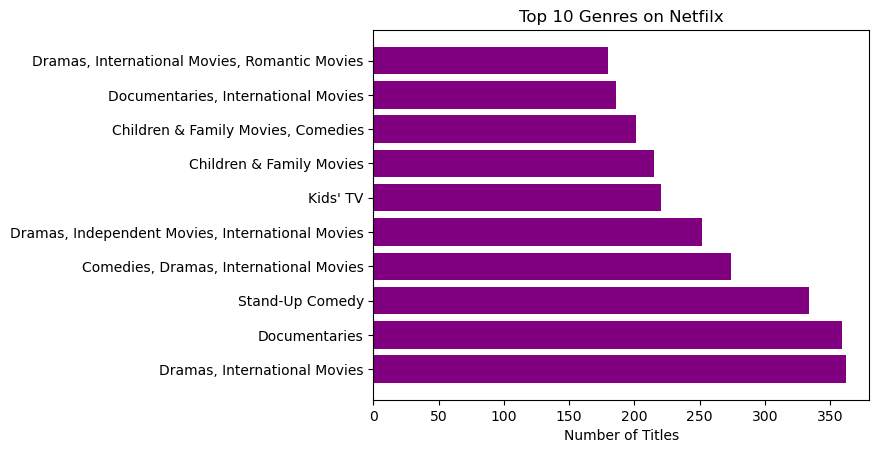

In [20]:
from collections import Counter
genre_series=df['listed_in'].dropna().apply(lambda x: x.split(' , '))
genre_flat = [genre for sublist in genre_series for genre in sublist]
top_genre=Counter(genre_flat).most_common(10)
genres,counts=zip(*top_genre)
plt.barh(genres,counts,color='purple')
plt.title("Top 10 Genres on Netfilx")
plt.xlabel("Number of Titles")
plt.show()

         

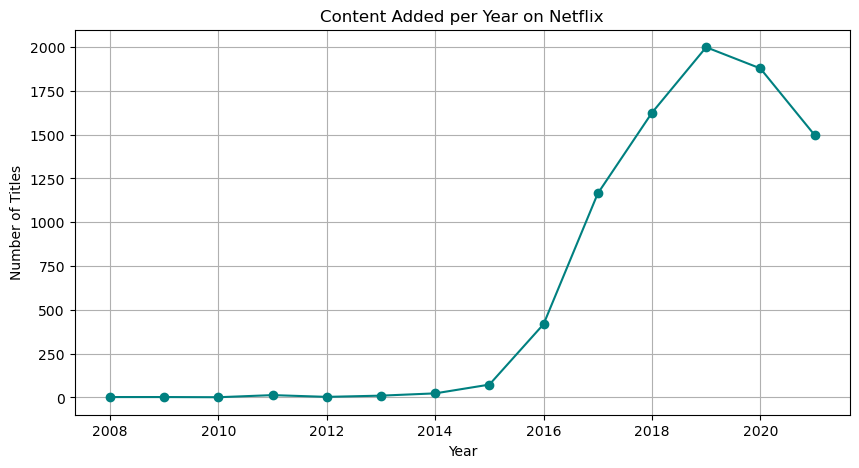

In [21]:
content_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,5))
plt.plot(content_by_year.index, content_by_year.values, marker='o', color='teal')
plt.title("Content Added per Year on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


C:\Users\Laxmi\AppData\Local\Temp\ipykernel_14196\1934123295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")


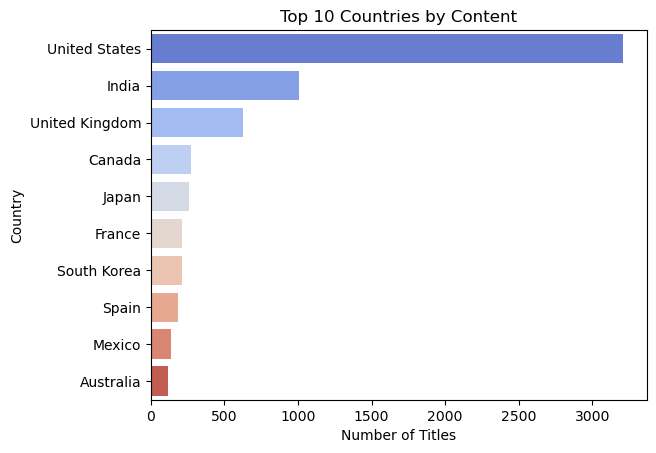

In [22]:
top_countries = df['country'].dropna().apply(lambda x: x.split(',')[0]).value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="coolwarm")
plt.title("Top 10 Countries by Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()
